In [1]:
import numpy as np
import math
import tensorflow as tf

from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.metrics import confusion_matrix

from keras import layers
from keras.optimizers import Adam
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, Dropout
from keras.layers import MaxPooling2D
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import keras.backend as K

import pydot
from IPython.display import SVG
K.set_image_data_format('channels_last')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
DLModel = Sequential()

DLModel.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
DLModel.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

DLModel.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
DLModel.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

DLModel.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
DLModel.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

DLModel.add(Conv2D(filters = 128, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
DLModel.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

DLModel.add(Conv2D(filters = 128, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
DLModel.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

DLModel.add(Flatten())

DLModel.add(Dense(256, activation = 'relu'))

DLModel.add(Dropout(0.4))

DLModel.add(Dense(6, activation = 'softmax'))

In [6]:
DLModel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [7]:
train_path = '/content/gdrive/My Drive/Arihant/Dataset'
test_path = '/content/gdrive/My Drive/Arihant/Test_Set'

datagen = ImageDataGenerator(rescale = 1./255)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size = (256, 256),
    color_mode = 'rgb', 
    class_mode = 'sparse', 
    batch_size = 32,
    shuffle = True,
    seed = 123)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size = (256, 256),
    color_mode = 'rgb', 
    class_mode = 'sparse', 
    batch_size = 32,
    shuffle = True,
    seed = 123)

Found 7176 images belonging to 6 classes.
Found 1268 images belonging to 6 classes.


In [8]:
history = DLModel.fit(train_generator, epochs = 20, validation_data = test_generator)
print(history.history.keys())

Epoch 1/20
225/225 [==============================] - 2250s 10s/step - loss: 1.7766 - accuracy: 0.2284 - val_loss: 1.7276 - val_accuracy: 0.2973
Epoch 2/20
225/225 [==============================] - 991s 4s/step - loss: 1.6578 - accuracy: 0.3225 - val_loss: 1.5541 - val_accuracy: 0.3667
Epoch 3/20
225/225 [==============================] - 987s 4s/step - loss: 1.5269 - accuracy: 0.3979 - val_loss: 1.4377 - val_accuracy: 0.4345
Epoch 4/20
225/225 [==============================] - 988s 4s/step - loss: 1.4180 - accuracy: 0.4493 - val_loss: 1.3297 - val_accuracy: 0.4811
Epoch 5/20
225/225 [==============================] - 989s 4s/step - loss: 1.3144 - accuracy: 0.4877 - val_loss: 1.2933 - val_accuracy: 0.5032
Epoch 6/20
225/225 [==============================] - 990s 4s/step - loss: 1.2034 - accuracy: 0.5336 - val_loss: 1.3074 - val_accuracy: 0.4953
Epoch 7/20
225/225 [==============================] - 991s 4s/step - loss: 1.0783 - accuracy: 0.5826 - val_loss: 1.3239 - val_accuracy: 0.50

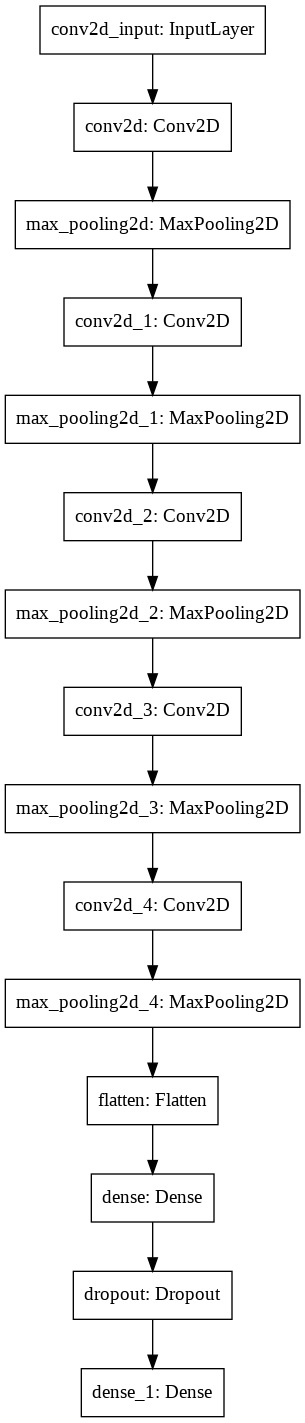

In [9]:
plot_model(DLModel)

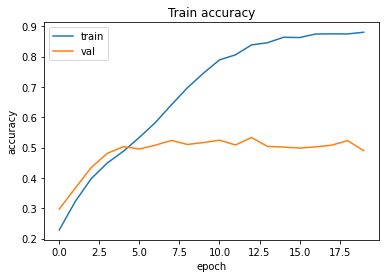

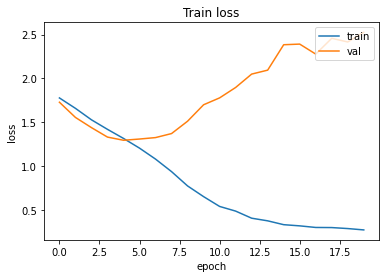

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [11]:
predictions = DLModel.predict(test_generator, verbose = 1)

40/40 [==============================] - 61s 2s/step


In [12]:
true_classes = test_generator.classes
pred_classes = np.argmax(predictions, axis=1)

classes = test_generator.class_indices
classes

{'drone': 0,
 'fighter-jet': 1,
 'helicopter': 2,
 'missile': 3,
 'passenger-plane': 4,
 'rocket': 5}

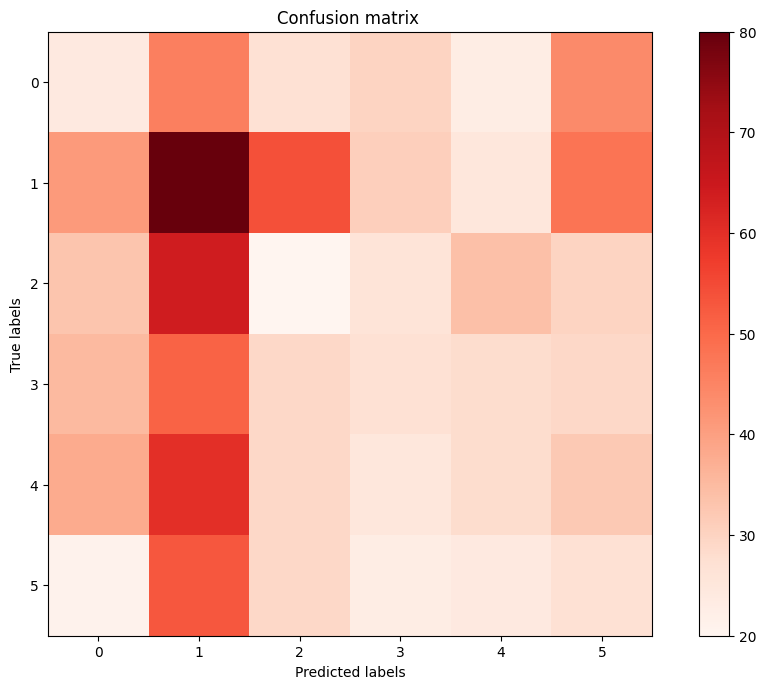

In [13]:
cm = confusion_matrix(test_generator.classes, pred_classes)

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

plt.imshow(cm, cmap=plt.cm.Reds)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.title('Confusion matrix ')
plt.colorbar()
plt.show()